In [183]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [232]:
def readData(filename):
    f = open(filename)
    ret=[]
    for each_line in f.readlines():
        data_arr=each_line.strip().split(",")
        temp=[]
        for i in range(len(data_arr)):
            temp.append(float(data_arr[i]))
        ret.append(temp)
    return np.array(ret)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def h(theta,x):
    return sigmoid(np.dot(x,theta))
def cost(theta,X,y):
    first = (-y) * np.log(h(theta,X))
    second = (1 - y)*np.log(1-h(theta,X))
    return np.mean(first - second)
def gradient(theta, X, y):
    return (X.T.dot(h(theta,X) - y))/len(X)  


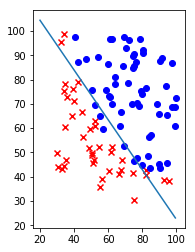

In [235]:
data = readData("ex2data1.txt")
x = data[:,:-1]
y = data[:,-1]
m=x.shape[0]#样本的数目
n=x.shape[1]#特征的数目
one=np.ones([m,1])
X=np.hstack([one,x])
theta=np.zeros(n+1)

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

plt.subplot(1,2,1)
label0 = np.where(y.ravel() == 0)
plt.scatter(x[label0,0],x[label0,1],marker='x',color = 'r')
label1 = np.where(y.ravel() == 1)
plt.scatter(x[label1,0],x[label1,1],marker='o',color = 'b')

theta=result[0]
x_draw1=np.arange(20,100,0.5)
x_draw2=(-theta[0]-theta[1]*x_draw1)/theta[2]

plt.plot(x_draw1,x_draw2,"-")
plt.show()
